In [ ]:
import pandas as pd
from functools import reduce

In [ ]:
# Lendo CSV
frango = pd.read_csv("frango.csv", sep=",", header=3, decimal=".", 
                    encoding="utf-8")
milho = pd.read_csv("milho.csv", sep=",", header=3, decimal=".", 
                    encoding="utf-8")
soja = pd.read_csv("soja.csv", sep=",", header=3, decimal=".", 
                    encoding="utf-8")
# Eliminando a coluna de preço em dolar
frango.drop(columns="À vista US$", inplace=True)
milho.drop(columns="À vista US$", inplace=True)
soja.drop(columns="À vista US$", inplace=True)

In [ ]:
# Gerando datas entre 02-01-2007 e 30-12-2021.
dias = pd.DataFrame(pd.date_range(start='2007-01-02', end='2021-12-30', freq='D').strftime('%d/%m/%Y'),
                    columns=['Data'])
dataframes = [dias, frango, milho, soja]
# Juntando todos os dataframes com merge left pelo campo 'Data', pois queremos manter somente os dados com das datas 
# listadas em 'dias'
dataframe = reduce(lambda left, right: pd.merge(left, right, on=['Data'], how='left'), dataframes)
dataframe.columns = ['data', 'frango', 'milho', 'soja']
# Excluindo todas as LINHAS que possuirem TODOS os campos de coluna com valores 'NaN'
dataframe = dataframe.dropna(axis=0, how='any')
# Convertendo o preço do milho e da soja de saca para kg
dataframe['milho'] = dataframe['milho'] / 60
dataframe['soja'] = dataframe['soja'] / 60 
dataframe.reset_index(inplace=True, drop=True)

In [ ]:
dataframe

,data,frango,milho,soja
0,02/01/2007,2.08,0.413333,0.566667
1,03/01/2007,2.14,0.413333,0.558333
2,04/01/2007,2.15,0.415167,0.561167
3,05/01/2007,2.16,0.417500,0.561167
4,08/01/2007,2.16,0.419167,0.563000
...,...,...,...,...
3724,23/12/2021,6.71,1.496833,2.907333
3725,27/12/2021,6.46,1.499833,2.934333
3726,28/12/2021,6.58,1.505667,2.936833
3727,29/12/2021,6.55,1.506167,2.940333


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataframe.corr()

,frango,milho,soja
frango,1.000000,0.909519,0.933481
milho,0.909519,1.000000,0.943056
soja,0.933481,0.943056,1.000000


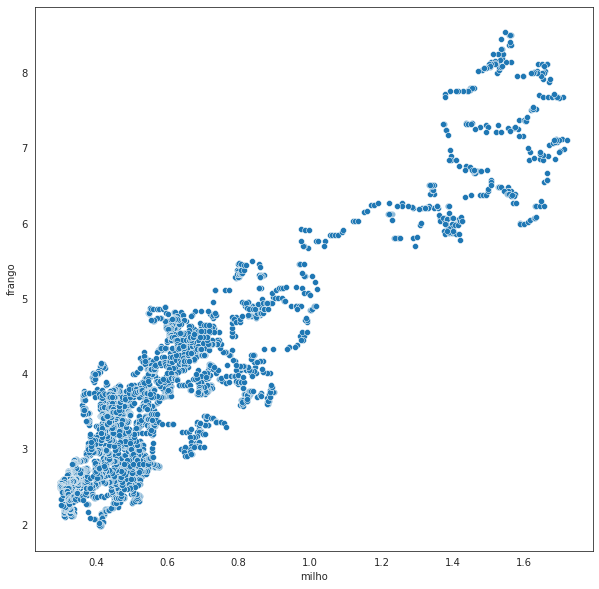

In [ ]:
# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
g = sns.scatterplot(x="milho", y="frango", 
                    data=dataframe)
plt.show()

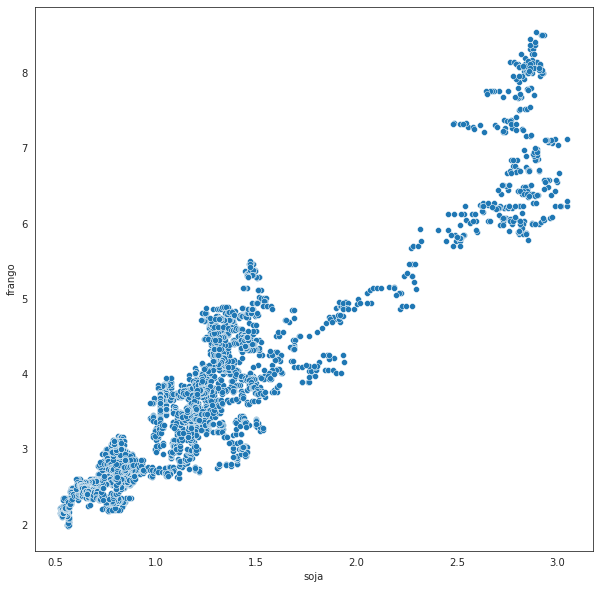

In [ ]:
# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
g = sns.scatterplot(x="soja", y="frango", 
                    data=dataframe)
plt.show()

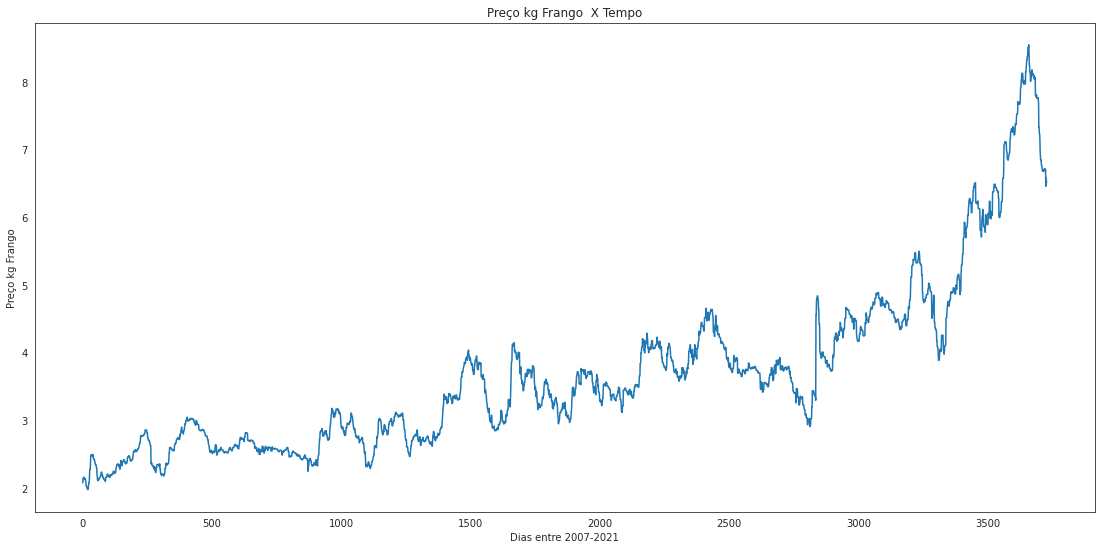

In [ ]:
plt.figure(figsize=(19,9))
plt.plot(dataframe['frango'])
plt.xlabel("Dias entre 2007-2021") 
plt.ylabel("Preço kg Frango") 
plt.title('Preço kg Frango  X Tempo')
plt.show()

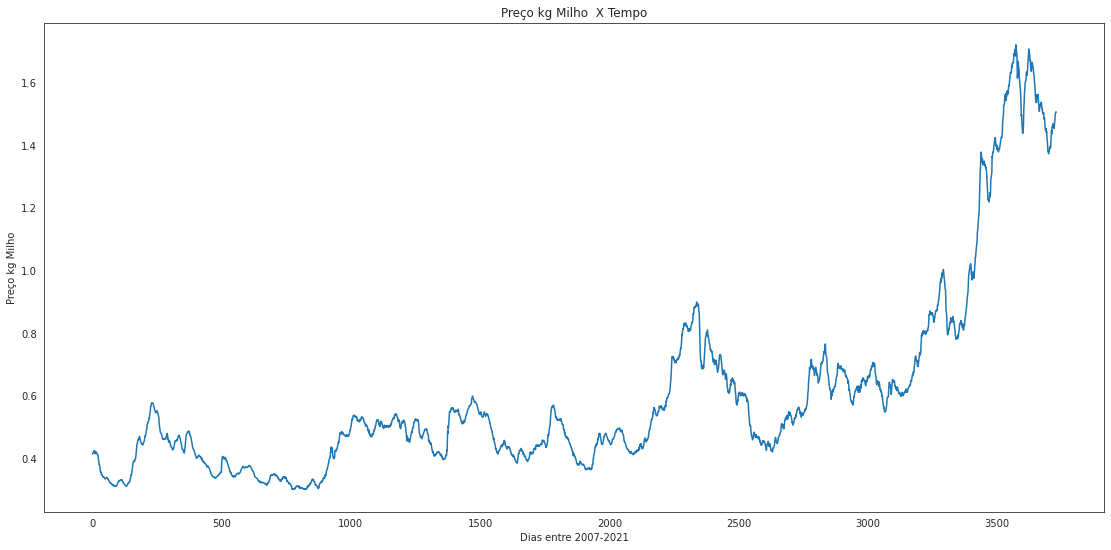

In [ ]:
plt.figure(figsize=(19,9))
plt.plot(dataframe['milho'])
plt.xlabel("Dias entre 2007-2021") 
plt.ylabel("Preço kg Milho") 
plt.title('Preço kg Milho  X Tempo')
plt.show()

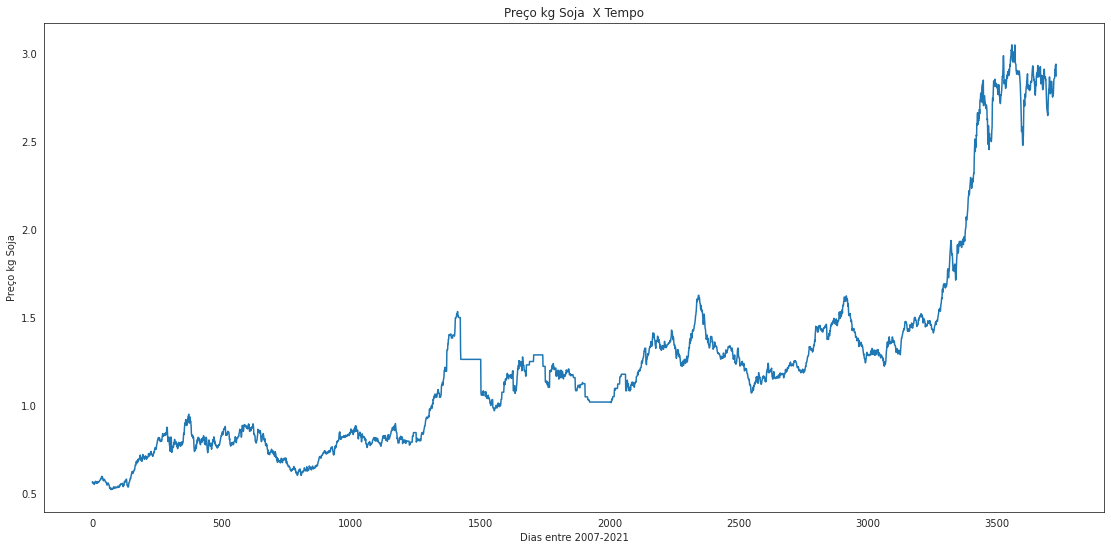

In [ ]:
plt.figure(figsize=(19,9))
plt.plot(dataframe['soja'])
plt.xlabel("Dias entre 2007-2021") 
plt.ylabel("Preço kg Soja") 
plt.title('Preço kg Soja  X Tempo')
plt.show()